In [1]:
import pandas as pd

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 73c68257545b5f8530b7044f56647bd2db92e2ba
python           : 3.9.13.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22000
machine          : AMD64
processor        : AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.3.3
numpy            : 1.23.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 22.2.2
setuptools       : 58.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.0.3
IPython          : 7.29.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec           

C:\Users\Emmanuel Allan M J\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
oo = pd.read_csv("./olympics.csv", skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
oo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


## Accessing series

In [5]:
oo['Athlete']

0               HAJOS, Alfred
1            HERSCHMANN, Otto
2           DRIVAS, Dimitrios
3          MALOKINIS, Ioannis
4          CHASAPIS, Spiridon
                 ...         
29211          ENGLICH, Mirko
29212    MIZGAITIS, Mindaugas
29213         PATRIKEEV, Yuri
29214           LOPEZ, Mijain
29215          BAROEV, Khasan
Name: Athlete, Length: 29216, dtype: object

In [6]:
oo.Athlete

0               HAJOS, Alfred
1            HERSCHMANN, Otto
2           DRIVAS, Dimitrios
3          MALOKINIS, Ioannis
4          CHASAPIS, Spiridon
                 ...         
29211          ENGLICH, Mirko
29212    MIZGAITIS, Mindaugas
29213         PATRIKEEV, Yuri
29214           LOPEZ, Mijain
29215          BAROEV, Khasan
Name: Athlete, Length: 29216, dtype: object

In [7]:
oo[['City','Edition','Athlete']]

,City,Edition,Athlete
0,Athens,1896,"HAJOS, Alfred"
1,Athens,1896,"HERSCHMANN, Otto"
2,Athens,1896,"DRIVAS, Dimitrios"
3,Athens,1896,"MALOKINIS, Ioannis"
4,Athens,1896,"CHASAPIS, Spiridon"
...,...,...,...
29211,Beijing,2008,"ENGLICH, Mirko"
29212,Beijing,2008,"MIZGAITIS, Mindaugas"
29213,Beijing,2008,"PATRIKEEV, Yuri"
29214,Beijing,2008,"LOPEZ, Mijain"


In [8]:
type(oo)

pandas.core.frame.DataFrame

In [9]:
type(oo[['City','Edition','Athlete']])

pandas.core.frame.DataFrame

## Shape

In [10]:
oo.shape

(29216, 10)

In [11]:
oo.shape[0]

29216

In [12]:
oo.shape[1]

10

### tail and head

In [13]:
oo.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


#### Info

In [14]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


## Value counts

In [15]:
oo.Edition.value_counts()

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Edition, dtype: int64

In [16]:
oo.Gender.value_counts(ascending=True,dropna=True)

Women     7495
Men      21721
Name: Gender, dtype: int64

## sort_values()

In [17]:
oo.Athlete.sort_values()

651                 AABYE, Edgar
2849       AALTONEN, Arvo Ossian
2852       AALTONEN, Arvo Ossian
7716    AALTONEN, Paavo Johannes
7730    AALTONEN, Paavo Johannes
                  ...           
603                   ÖSTMO, Ole
608                   ÖSTMO, Ole
621                   ÖSTMO, Ole
596                   ÖSTMO, Ole
8051           ÖSTRAND, Per-Olof
Name: Athlete, Length: 29216, dtype: object

In [18]:
ath = oo.Athlete.sort_values()
ath

651                 AABYE, Edgar
2849       AALTONEN, Arvo Ossian
2852       AALTONEN, Arvo Ossian
7716    AALTONEN, Paavo Johannes
7730    AALTONEN, Paavo Johannes
                  ...           
603                   ÖSTMO, Ole
608                   ÖSTMO, Ole
621                   ÖSTMO, Ole
596                   ÖSTMO, Ole
8051           ÖSTRAND, Per-Olof
Name: Athlete, Length: 29216, dtype: object

In [19]:
oo.sort_values(by=['Edition','Athlete'])

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
82,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,rope climbing,M,Gold
110,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,"team, parallel bars",M,Silver
111,Athens,1896,Gymnastics,Artistic G.,"ATHANASOPOULOS, Spyros",GRE,Men,"team, parallel bars",M,Silver
48,Athens,1896,Cycling,Cycling Road,"BATTEL, Edward",GBR,Men,individual road race,M,Bronze
...,...,...,...,...,...,...,...,...,...,...
28095,Beijing,2008,Equestrian,Dressage,"ZU-SAYN WITTGENSTEIN, Nathalie",DEN,Women,team,X,Bronze
28819,Beijing,2008,Sailing,Sailing,"ZUBARI, Shahar",ISR,Men,RS:X - Windsurfer,M,Bronze
28977,Beijing,2008,Taekwondo,Taekwondo,"ZUBCIC, Martina",CRO,Women,49 - 57 kg,W,Bronze
28387,Beijing,2008,Gymnastics,Rhythmic G.,"ZUEVA, Natalia",RUS,Women,group competition,W,Gold


## Boolean indexing

In [20]:
oo.Medal == 'Gold'

0         True
1        False
2        False
3         True
4        False
         ...  
29211    False
29212    False
29213    False
29214     True
29215    False
Name: Medal, Length: 29216, dtype: bool

In [21]:
oo[oo.Medal == 'Gold']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29199,Beijing,2008,Wrestling,Wrestling Gre-R,"GUENOT, Steeve",FRA,Men,60 - 66kg,M,Gold
29203,Beijing,2008,Wrestling,Wrestling Gre-R,"KVIRKELIA, Manuchar",GEO,Men,66 - 74kg,M,Gold
29206,Beijing,2008,Wrestling,Wrestling Gre-R,"MINGUZZI, Andrea",ITA,Men,74 - 84kg,M,Gold
29210,Beijing,2008,Wrestling,Wrestling Gre-R,"KHUSHTOV, Aslanbek",RUS,Men,84 - 96kg,M,Gold


In [22]:
oo[(oo.Medal == 'Gold') & (oo.Gender == 'Women')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
417,Paris,1900,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,individual,W,Gold
641,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,mixed doubles,X,Gold
649,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,singles,W,Gold
710,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double columbia round (50y - 40y - 30y),W,Gold
713,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double national round (60y - 50y),W,Gold
...,...,...,...,...,...,...,...,...,...,...
29134,Beijing,2008,Weightlifting,Weightlifting,"CAO, Lei",CHN,Women,75kg,W,Gold
29147,Beijing,2008,Wrestling,Wrestling Free.,"HUYNH, Carol",CAN,Women,- 48kg,W,Gold
29155,Beijing,2008,Wrestling,Wrestling Free.,"YOSHIDA, Saori",JPN,Women,48 - 55kg,W,Gold
29163,Beijing,2008,Wrestling,Wrestling Free.,"ICHO, Kaori",JPN,Women,55 - 63kg,W,Gold


## String Handling

In [23]:
oo[oo.Athlete.str.contains('Florence')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1843,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,individual,W,Gold
1848,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,pairs,X,Bronze
4173,Paris,1924,Aquatics,Swimming,"BARKER, Florence",GBR,Women,4x100m freestyle relay,W,Silver
8162,Helsinki,1952,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Bronze
9060,Melbourne / Stockholm,1956,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Silver
10849,Tokyo,1964,Athletics,Athletics,"AMOORE-POLLOCK, Judith Florence",AUS,Women,400m,W,Bronze
16817,Los Angeles,1984,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Silver
18287,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,100m,W,Gold
18305,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Gold
18347,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,4x100m relay,W,Gold


## Challenge

In [24]:
## In which event did jesse owens win a medal
oo[oo.Athlete.str.contains('OWENS, Jesse')].Event.value_counts()

100m            1
200m            1
4x100m relay    1
long jump       1
Name: Event, dtype: int64

In [25]:
# Which country has won the most men's gold medals in singles badminton over the years? Sort the results alphabetically by the player's names.
oo[(oo.Gender == 'Men') & (oo.Medal == 'Gold') & (oo.Discipline== 'Badminton')].sort_values(by=['Athlete']).NOC.value_counts()

INA    8
KOR    6
CHN    4
DEN    1
Name: NOC, dtype: int64

In [26]:
## Three countries which has won the highest medal from 1984 to 2008
oo[(oo.Edition >=1984)]['NOC'].value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

In [27]:
## Gold metal in track and fields
oo[(oo.Gender=='Men')&(oo.Medal=='Gold')&(oo.Event == '100m')].sort_values(by=['Edition'],ascending=False)[['City',"Edition","Sport","NOC"]]

,City,Edition,Sport,NOC
27552,Beijing,2008,Athletics,JAM
25539,Athens,2004,Athletics,USA
23521,Sydney,2000,Athletics,USA
21598,Atlanta,1996,Athletics,CAN
19859,Barcelona,1992,Athletics,GBR
18284,Seoul,1988,Athletics,USA
16794,Los Angeles,1984,Athletics,USA
15374,Moscow,1980,Athletics,GBR
14069,Montreal,1976,Athletics,TRI
12902,Munich,1972,Athletics,URS


# Plotting

In [28]:
import matplotlib.pyplot as plt
# If you want to plot graph in notebook we use this
%matplotlib inline

## Line plot

In [31]:
fo = oo[oo.Edition == 1896]
fo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
146,Athens,1896,Weightlifting,Weightlifting,"JENSEN, Viggo",DEN,Men,heavyweight - two hand lift,M,Gold
147,Athens,1896,Weightlifting,Weightlifting,"ELLIOTT, Launceston",GBR,Men,heavyweight - two hand lift,M,Silver
148,Athens,1896,Wrestling,Wrestling Gre-R,"CHRISTOPOULOS, Stephanos",GRE,Men,open event,M,Bronze
149,Athens,1896,Wrestling,Wrestling Gre-R,"SCHUMANN, Carl",GER,Men,open event,M,Gold


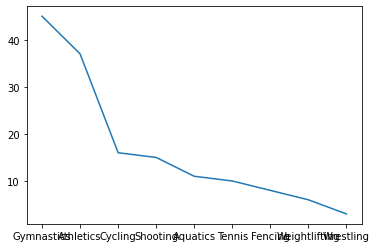

In [34]:
# default is line
# To suppress the line above the graph we use semicolon
fo.Sport.value_counts().plot(kind='line');

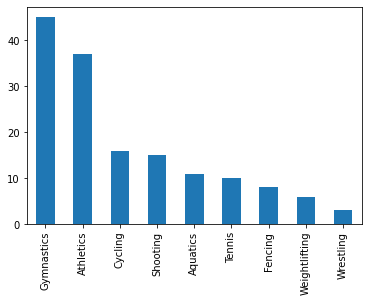

In [35]:
fo.Sport.value_counts().plot(kind='bar');

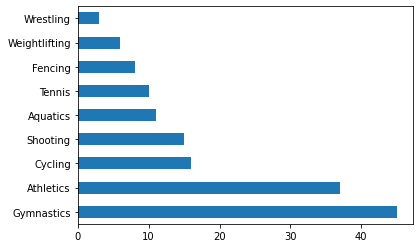

In [36]:
fo.Sport.value_counts().plot(kind='barh');

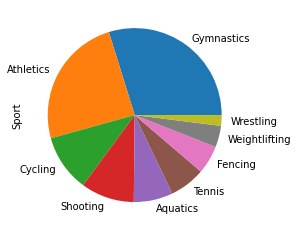

In [37]:
fo.Sport.value_counts().plot(kind='pie');

## Color

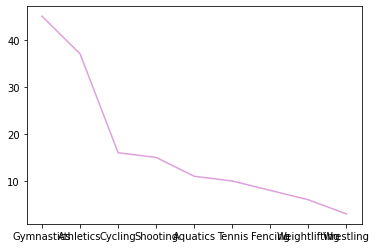

In [38]:
fo.Sport.value_counts().plot(kind='line', color='plum');

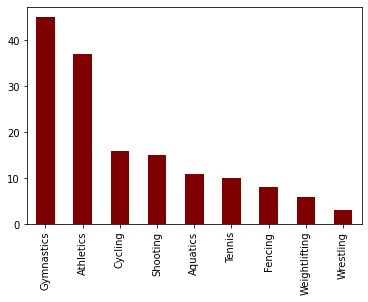

In [40]:
fo.Sport.value_counts().plot(kind='bar', color="maroon");

## figsize

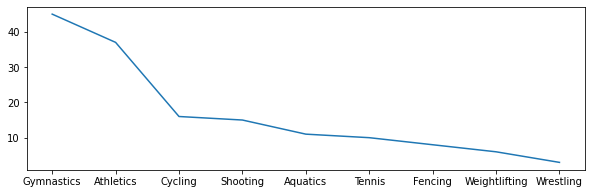

In [41]:
fo.Sport.value_counts().plot(kind='line',figsize=(10,3));

## Color maps

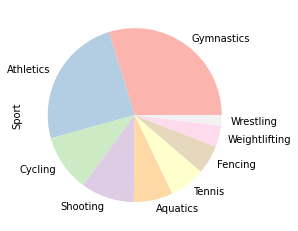

In [44]:
fo.Sport.value_counts().plot(kind='pie',colormap="Pastel1");

# Seaborn basic plotting

In [46]:
import seaborn as sns

#### How many medals have been won by men and women in the history of the Olympics. How many gold, silver and bronze medals were won for each gender?

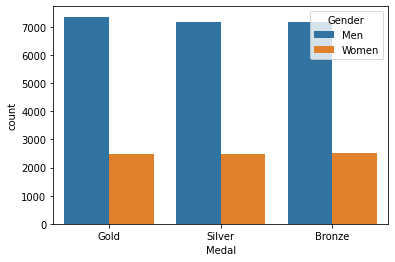

In [55]:
sns.countplot(x='Medal',data=oo,hue='Gender');

In [54]:
oo.Medal.value_counts()

Gold      9850
Bronze    9689
Silver    9677
Name: Medal, dtype: int64

In [65]:
oo[(oo.Gender=='Women')].Medal.value_counts()

Bronze    2514
Silver    2496
Gold      2485
Name: Medal, dtype: int64

In [67]:
oo[(oo.Gender=='Men')].Medal.value_counts()

Gold      7365
Silver    7181
Bronze    7175
Name: Medal, dtype: int64

## Challenge

In [70]:
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


<AxesSubplot:xlabel='Gender', ylabel='count'>

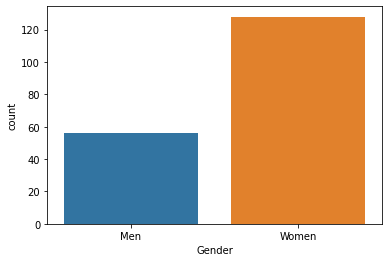

In [91]:
# Plot the number of medals achieved by the Chinese team (men and women) in Beijing 2008 using Matplotlib Seaborn
mw = oo[(oo.Edition == 2008)&(oo.NOC=='CHN')]
sns.countplot(x='Gender',data=mw)

<AxesSubplot:>

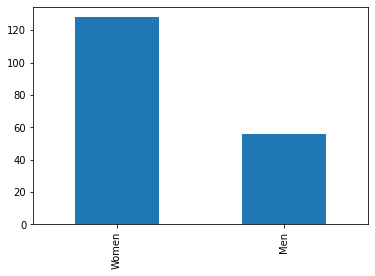

In [81]:
oo[(oo.Edition == 2008)&(oo.NOC=='CHN')].Gender.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='count'>

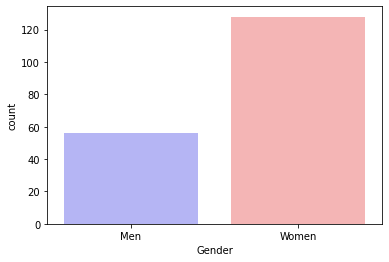

In [89]:
# How can you use colormaps to give the data more meaning?
sns.countplot(x='Gender',data=oo[(oo.Edition == 2008)&(oo.NOC=='CHN')],palette='bwr')

<AxesSubplot:xlabel='Medal', ylabel='count'>

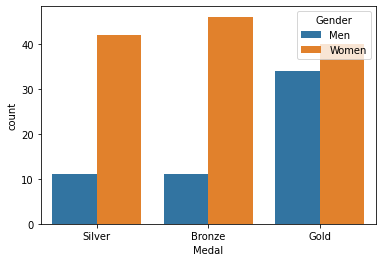

In [92]:
# Plot the number of gold, silver, and bronze medals for each gender.
sns.countplot(x='Medal',data=mw,hue='Gender')

<AxesSubplot:xlabel='Medal', ylabel='count'>

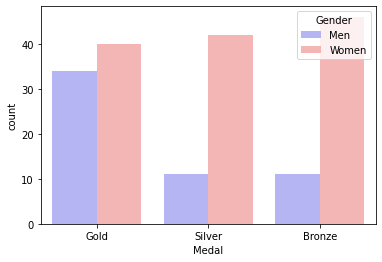

In [94]:
# How can you give the data more meaning? Is there anything else you can change to make it more intuitive?
sns.countplot(x='Medal',data=mw,hue='Gender',palette='bwr',order=['Gold','Silver','Bronze'])